In [2]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

### Questions for GeoSPARQL queries

>- Which buildings are depicted as building (not settlement area) in all three scales?

In [4]:
# Perform query and get results in JSON format via HTTP from local GeoSPARQL endpoint (GeoSPARQL Fuseki)

q1 = SPARQLWrapper("http://localhost:3031/spo")
q1.setQuery("""
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
PREFIX spo: <http://ulusalharita.tr/ont/spo#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>


SELECT *
WHERE {

    ?indl geo:hasGeometry ?indlg ; spo:sameAsRelation ?indm .
    ?indlg spo:hasScale spo:largeScale ; geo:asWKT ?indlwkt .
    ?indm geo:hasGeometry ?indmg ; spo:sameAsRelation ?inds .
    ?indmg spo:hasScale spo:mediumScale ; geo:asWKT ?indmwkt .
    ?inds geo:hasGeometry ?indsg .
    ?indsg spo:hasScale spo:smallScale ; geo:asWKT ?indswkt .

}
""")
q1.setReturnFormat(JSON)

r1 = q1.query().convert()

In [5]:
# Convert individuals and their results to a GeoDataFrame

ind = []
geo = []

for r in r1["results"]["bindings"]:
    ind.append(r['indl']['value'])
    geo.append(r['indlwkt']['value'])
    ind.append(r['indm']['value'])
    geo.append(r['indmwkt']['value'])
    ind.append(r['inds']['value'])
    geo.append(r['indswkt']['value'])
    
t1 = pd.DataFrame({'individual':ind,'geometry':geo})
t1.drop_duplicates(inplace=True, ignore_index=True)
t1 = gpd.GeoDataFrame(t1, geometry=t1['geometry'].apply(wkt.loads))
t1.set_crs('EPSG:4326',inplace=True)

,individual,geometry
0,http://ulusalharita.tr/id/topo#ibb5095,"POLYGON ((28.93939 41.00591, 28.93933 41.00607..."
1,http://ulusalharita.tr/id/topo#osm2301,"POLYGON ((28.93936 41.00606, 28.93943 41.00590..."
2,http://ulusalharita.tr/id/topo#hgm230,"POLYGON ((28.93987 41.00603, 28.93939 41.00592..."
3,http://ulusalharita.tr/id/topo#ibb26661,"POLYGON ((28.97843 41.01108, 28.97845 41.01108..."
4,http://ulusalharita.tr/id/topo#osm703,"POLYGON ((28.97836 41.01095, 28.97840 41.01092..."
...,...,...
271,http://ulusalharita.tr/id/topo#osm1442,"POLYGON ((28.94330 41.00206, 28.94344 41.00210..."
272,http://ulusalharita.tr/id/topo#hgm257,"POLYGON ((28.94341 41.00210, 28.94328 41.00206..."
273,http://ulusalharita.tr/id/topo#ibb9422,"POLYGON ((28.98120 41.01220, 28.98150 41.01205..."
274,http://ulusalharita.tr/id/topo#osm21,"POLYGON ((28.98130 41.01182, 28.98152 41.01206..."


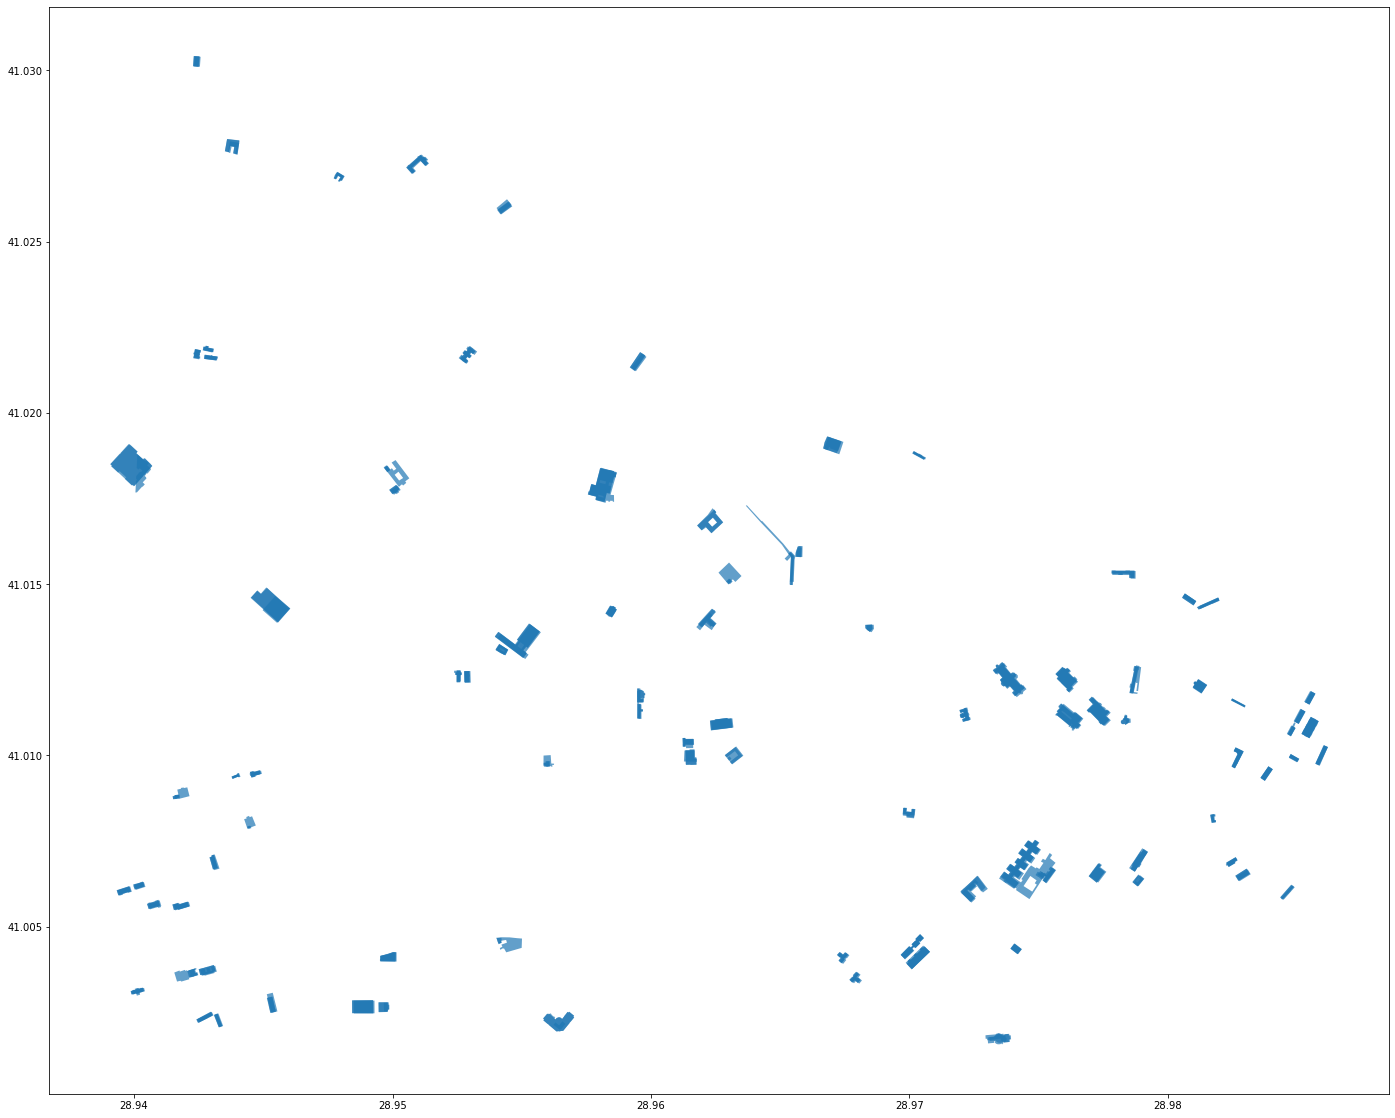

In [27]:
# Plot results to a simple map
import matplotlib.pyplot as plt
t1.plot(figsize=(30,20),alpha=0.7);

In [76]:
# Plot results on a more sophisticated web map

import folium
from folium.plugins import MiniMap
from folium.plugins import MeasureControl
from folium.features import GeoJsonTooltip, GeoJsonPopup

m = folium.Map(location=[41.015015,28.965275],tiles='cartodbpositron',zoom_start=14)

folium.GeoJson(t1,
               name='Layer', 
               show=True, 
               ).add_to(m)

folium.LayerControl().add_to(m)
MiniMap(tile_layer='cartodbpositron',zoom_level_offset=-6, toggle_display=True).add_to(m)
MeasureControl().add_to(m)
m

#### A closer look to a set of building for the above query
<div>
<img src="q1.jpg" width="750"/>
</div>

>- Show all the buildings that are suitable for wheelchair in the whole area?

In [28]:
# Perform query and get results in JSON format via HTTP from local GeoSPARQL endpoint (GeoSPARQL Fuseki)

q2 = SPARQLWrapper("http://localhost:3031/spo")
q2.setQuery("""
PREFIX dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
PREFIX spo: <http://ulusalharita.tr/ont/spo#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT *
WHERE {
    
    ?ind spo:hasWheelchair 'yes' ; geo:hasGeometry ?indg .
    ?indg geo:asWKT ?indwkt .
    
    ?indw spo:hasWheelchair 'yes' .
    ?indr spo:subSetOf ?indw ; geo:hasGeometry ?indrg .
    ?indrg geo:asWKT ?indrwkt .

}
""")
q2.setReturnFormat(JSON)

r2 = q2.query().convert()

In [29]:
# Convert individuals and their results to a GeoDataFrame


ind2 = []
geo2 = []

for r in r2["results"]["bindings"]:
    ind2.append(r['ind']['value'])
    geo2.append(r['indwkt']['value'])
    geo2.append(r['indrwkt']['value'])   
    ind2.append(r['indr']['value'])

t2 = pd.DataFrame({'individual':ind2, 'geometry':geo2})
t2.drop_duplicates(inplace=True, ignore_index=True)
t2 = gpd.GeoDataFrame(t2, geometry=t2['geometry'].apply(wkt.loads))
t2.set_crs('EPSG:4326',inplace=True)

,individual,geometry
0,http://ulusalharita.tr/id/topo#osm587,"POLYGON ((28.97618 41.00772, 28.97632 41.00781..."
1,http://ulusalharita.tr/id/topo#ibb9687,"POLYGON ((28.96127 41.00903, 28.96112 41.00892..."
2,http://ulusalharita.tr/id/topo#ibb11302,"POLYGON ((28.96133 41.00899, 28.96130 41.00895..."
3,http://ulusalharita.tr/id/topo#ibb32011,"POLYGON ((28.97062 41.01658, 28.97059 41.01655..."
4,http://ulusalharita.tr/id/topo#ibb32007,"POLYGON ((28.97102 41.01702, 28.97094 41.01706..."
...,...,...
180,http://ulusalharita.tr/id/topo#osm741,"POLYGON ((28.97685 41.00936, 28.97674 41.00930..."
181,http://ulusalharita.tr/id/topo#osm108,"POLYGON ((28.96027 41.01249, 28.96038 41.01242..."
182,http://ulusalharita.tr/id/topo#osm906,"POLYGON ((28.95622 41.01457, 28.95635 41.01446..."
183,http://ulusalharita.tr/id/topo#osm7335,"POLYGON ((28.94364 41.01830, 28.94348 41.01821..."


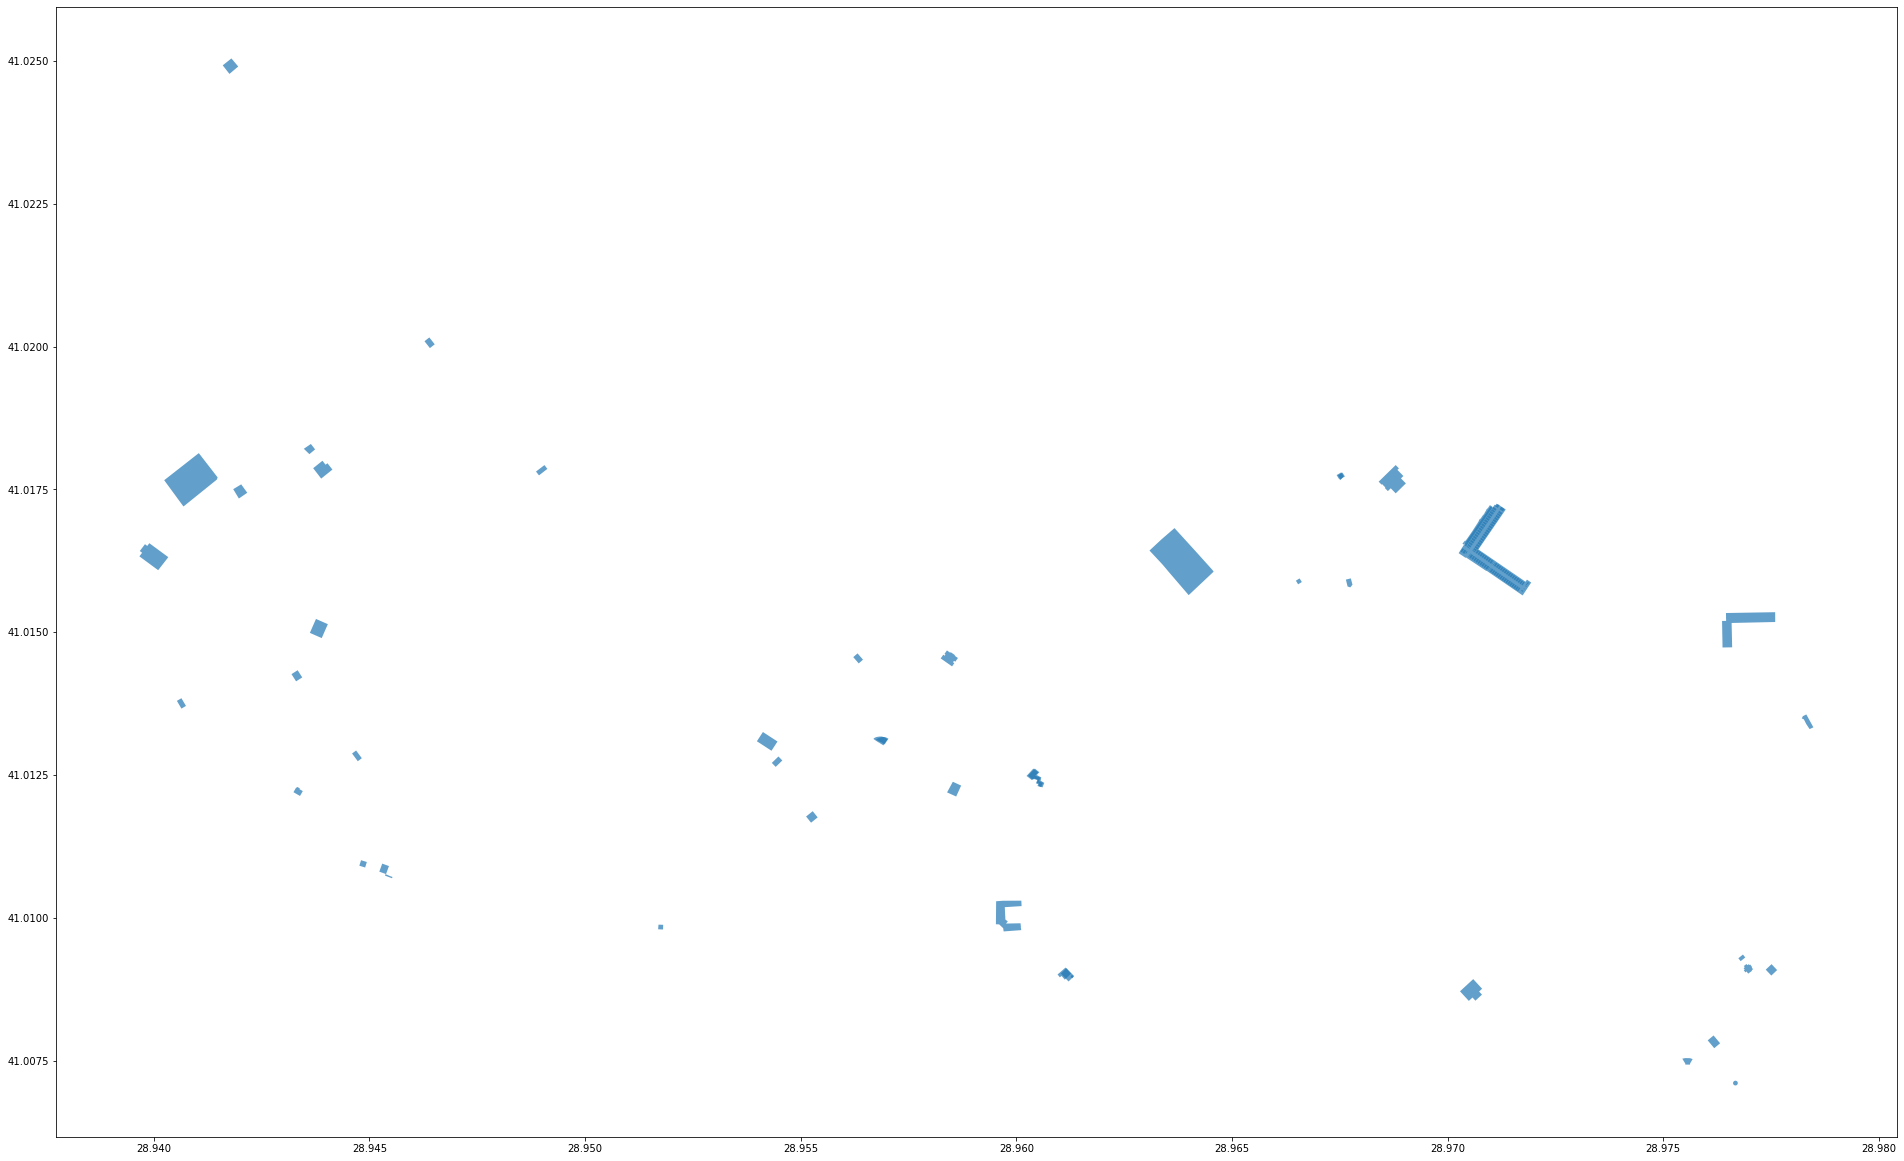

In [34]:
# Plot results to a simple map

t2.plot(figsize=(33,25),alpha=0.7);

In [73]:
# Plot results on a more sophisticated web map

import folium
from folium.plugins import MiniMap
from folium.plugins import MeasureControl
from folium.features import GeoJsonTooltip, GeoJsonPopup

m = folium.Map(location=[41.016015,28.959275],tiles='cartodbpositron',zoom_start=15)

folium.GeoJson(t2,
               name='Layer', 
               show=True, 
               ).add_to(m)

folium.LayerControl().add_to(m)
MiniMap(tile_layer='cartodbpositron',zoom_level_offset=-6, position='bottomleft', toggle_display=True).add_to(m)
MeasureControl().add_to(m)
m

>- Which Shops/Places are there in the historical building of Grand Bazaar?

In [8]:
# Perform query and get results in JSON format via HTTP from local GeoSPARQL endpoint (GeoSPARQL Fuseki)

q3 = SPARQLWrapper("http://localhost:3031/spo")
q3.setQuery("""
PREFIX dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
PREFIX geo: <http://www.opengis.net/ont/geosparql#>
PREFIX spo: <http://ulusalharita.tr/ont/spo#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT *
WHERE {
    
    ?indg spo:hasName_en "Grand Bazaar" ; geo:hasGeometry ?indgg .
    ?indgg geo:asWKT ?indgwkt .
    ?gbsub spo:subSetOf ?indg ; geo:hasGeometry ?gbsubg .
    ?gbsubg geo:asWKT ?gbsubwkt .
}
""")
q3.setReturnFormat(JSON)

r3 = q3.query().convert()

In [9]:
# Convert individuals and their results to a GeoDataFrame

ind3 = []
geo3 = []

for r in r3["results"]["bindings"]:
    ind3.append(r['gbsub']['value'])
    geo3.append(r['gbsubwkt']['value'])
    
t3 = pd.DataFrame({'individual':ind3, 'geometry':geo3})
t3.drop_duplicates(subset='geometry',keep='last' ,inplace=True, ignore_index=True)
t3 = gpd.GeoDataFrame(t3, geometry=t3['geometry'].apply(wkt.loads))
t3.set_crs('EPSG:4326',inplace=True)

,individual,geometry
0,http://ulusalharita.tr/id/topo#ibb31587,"POLYGON ((28.96938 41.01071, 28.96939 41.01071..."
1,http://ulusalharita.tr/id/topo#ibb32096,"POLYGON ((28.96803 41.01003, 28.96804 41.01003..."
2,http://ulusalharita.tr/id/topo#ibb32150,"POLYGON ((28.96783 41.01069, 28.96784 41.01069..."
3,http://ulusalharita.tr/id/topo#ibb31536,"POLYGON ((28.96705 41.01094, 28.96707 41.01095..."
4,http://ulusalharita.tr/id/topo#ibb31259,"POLYGON ((28.96771 41.01021, 28.96773 41.01021..."
...,...,...
1577,http://ulusalharita.tr/id/topo#ibb30567,"POLYGON ((28.96788 41.01008, 28.96789 41.01008..."
1578,http://ulusalharita.tr/id/topo#ibb31312,"POLYGON ((28.96828 41.01059, 28.96829 41.01059..."
1579,http://ulusalharita.tr/id/topo#ibb31630,"POLYGON ((28.96755 41.01004, 28.96756 41.01004..."
1580,http://ulusalharita.tr/id/topo#ibb31477,"POLYGON ((28.96718 41.01095, 28.96719 41.01095..."


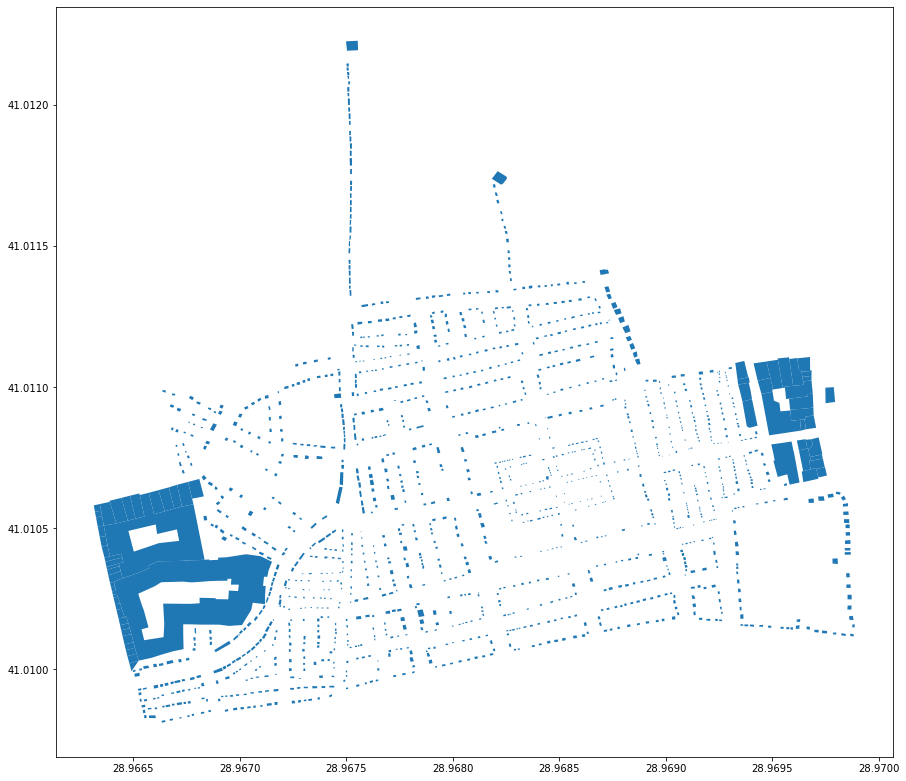

In [10]:
# Plot results to a simple map

t3.plot(figsize=(15,15));

In [11]:
# Plot results on a more sophisticated web map

import folium
from folium.plugins import MiniMap
from folium.plugins import MeasureControl
from folium.features import GeoJsonTooltip, GeoJsonPopup

m = folium.Map(location=[41.011015,28.968244],tiles='cartodbpositron',zoom_start=18)

folium.GeoJson(t3,
               name='Layer', 
               show=True, 
               ).add_to(m)

folium.LayerControl().add_to(m)
MiniMap(tile_layer='cartodbpositron',zoom_level_offset=-6, toggle_display=True).add_to(m)
MeasureControl().add_to(m)
m